<h1>Trabalho de Conclusão de Curso - IDESP</h1>
<h2>Entrega - 2</h2>
<p><b>Instituição:</b> FIA - Fundação Instituto de Administração</p>
<p><b>Conteúdo:</b> <b>Entrega 02</b> - Business Case e Técnicas de Estatística Clássica</p>
<p><b>Turma</b>: 12 </p>
<p><b>Ano</b>: 2020</p>
<p><b>Autor:</b> João Paulo Ribeiro dos Santos</p>
<p><b>Localização Projeto: </b> <a href = 'https://github.com/Joao-TheCosmosIsInfinite/FIA_Projeto_Machine_Learning' target = "_blank">Git Hub</a></p>

<h2>Indice/ Table of Contents</h2> 

[1. Importações das bibliotecas/ Library Imports](#head3_library)<br>
[2. Importações dos Datasets/ Dataset Imports](#head3_datasets)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Informações do IDESP/ IDESP Information](#head4_idesp)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Informações das Escolas/ School Information](#head4_schoolinfo)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Dependencias das Escolas/ School Facilities](#head4_facilities)<br>


<a id ='head3_library'></a>
<h3>1. Importações das bibliotecas/ Library Imports</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_rows', 200)

## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_columns', 50)

<a id ='head3_datasets'></a>
<h3>2. Importações dos Datasets/ Dataset Imports</h3>

<a id ='head4_idesp'></a>
<h4>2.1. Informações do IDESP/ IDESP Information</h4>

In [3]:
## IDESP  no ano de 2019
df_idesp_2019 = \
                pd.read_csv('data/IDESP/' \
                                'IDESP_ESCOLA_2019.csv')

<a id ='head4_schoolinfo'></a>
<h4>2.2. Informações das Escolas/ School Information</h4>

In [4]:
## Dados Geográficos das Escolas
df_school_geolocation = \
                        pd.read_csv('data/DADOS_ESCOLA/11_Escolas_Coordenadas.csv',
                                    sep = ';',
                                    decimal = ',',
                                    encoding  = 'ISO-8859-1')

<a id ='head4_facilities'></a>
<h4>2.3. Dependencias das Escolas/ School Facilities</h4>

In [5]:
## Dados da infraestrutura das escolas
df_school_dependecy = \
                        pd.read_csv('data/INSTALACAO_FISICA_ESCOLA/06_Escolas_Dependencias.csv',
                                    sep = ';')                                    

<a id = 'head3_dictionary'></a>
<h3>3. Dicionario das colunas dos dataframes/ Dictionary of dataframe's columns</h3>

| Object | Field| Description |
| :- | :- | :- |
| <b>df_school_geolocation</b> | NOMEDEP | Qualitativa Nominal |
| | DE | Qualitativa Nominal |
| | MUN | Qualitativa Nominal |
| | DISTR | Qualitativa Nominal |
| | COD_ESC | Qualitativa Nominal |
| | NOMESC | Qualitativa Nominal |
| | SITUACAO | Qualitativa Nominal |
| | TIPOESC | Qualitativa Nominal |
| | ENDESC | Qualitativa Nominal |
| | NUMESC | Quantitativa Discreta |
| | COMPLEND | Qualitativa Nominal |
| | CEP | Qualitativa Nominal |
| | BAIESC | Qualitativa Nominal |
| | ZONA | Qualitativa Nominal |
| | DS_LONGITUDE | Quantitativa Continua |
| | DS_LATITUDE | Quantitativa Continua |
| | CODVINC | Quantitativa Discreta |

<a id = 'head3_dataframe_info'></a>
<h3>4. Informação dos dataframes/ Dataframe's Information</h3>

<a id = 'head4_dataframe_dimension'></a>
<h4>4.1. Dimensão dos dataframes/ Dataframe's dimension</h4>

In [6]:
## Dimensão do dataframe
print('Dimensão do dataframe "df_school_dependecy":', \
                                                df_school_dependecy.shape)

print('Dimensão do dataframe "df_school_geolocation":', \
                                                df_school_geolocation.shape)

print('Dimensão do dataframe "df_idesp_2019":', \
                                                df_idesp_2019.shape)


Dimensão do dataframe "df_school_dependecy": (5608, 172)
Dimensão do dataframe "df_school_geolocation": (5736, 17)
Dimensão do dataframe "df_idesp_2019": (5047, 10)


In [7]:
## Schema do dataframe
df_school_geolocation.dtypes

NOMEDEP          object
DE               object
MUN              object
DISTR            object
COD_ESC           int64
NOMESC           object
SITUACAO         object
TIPOESC          object
ENDESC           object
NUMESC           object
COMPLEND         object
CEP               int64
BAIESC           object
ZONA             object
DS_LONGITUDE    float64
DS_LATITUDE     float64
CODVINC         float64
dtype: object

In [8]:
## Schema do dataframe
df_idesp_2019.dtypes

ANO_LETIVO           int64
CODIGO_CIE           int64
CODIGO_INEP          int64
CodigoDiretoria      int64
NomeDiretoria       object
NomeEscola          object
NomeMunicipio       object
ANOS_INICIAIS      float64
ANOS_FINAIS        float64
ENSINO_MÉDIO       float64
dtype: object

In [9]:
## Schema do dataframe
df_school_dependecy.dtypes

NOMEDEP                         object
DE                              object
MUN                             object
DISTR                           object
CODESC                           int64
NOMESC                          object
TIPOESC                          int64
TIPOESC_DESC                    object
SITUACAO                        object
SALAS_AULA                       int64
SALAS_ED_INF                     int64
SALAS_ED_ESP                     int64
SALAS_ED_ART                     int64
SALA_RECURSO                     int64
TOT_SALAS_AULA                   int64
AUDITORIO                        int64
ANFITEATRO                       int64
TEATRO                           int64
CANTINA                          int64
COPA                             int64
COZINHA                          int64
REFEITORIO                       int64
DEPOSITO_ALIMENTOS               int64
DESPENSA                         int64
TOT_DESPENSA                     int64
SALA_LEITURA             

<a id = 'head4_var_classification'></a>
<h4>4.2. Classificação das variáveis/ Variables classification</h4>

| Object | Field| Variable Classification |
| :- | :- | :- |
| <b>df_school_geolocation</b> | NOMEDEP | Qualitativa Nominal |
| | DE | Qualitativa Nominal |
| | MUN | Qualitativa Nominal |
| | DISTR | Qualitativa Nominal |
| | COD_ESC | Qualitativa Nominal |
| | NOMESC | Qualitativa Nominal |
| | SITUACAO | Qualitativa Nominal |
| | TIPOESC | Qualitativa Nominal |
| | ENDESC | Qualitativa Nominal |
| | NUMESC | Quantitativa Discreta |
| | COMPLEND | Qualitativa Nominal |
| | CEP | Qualitativa Nominal |
| | BAIESC | Qualitativa Nominal |
| | ZONA | Qualitativa Nominal |
| | DS_LONGITUDE | Quantitativa Continua |
| | DS_LATITUDE | Quantitativa Continua |
| | CODVINC | Quantitativa Discreta |

<a id = 'head3_null_values'></a>
<h3>5. Verificar valores nulos/ Identify nullable values</h3>

<a id = 'head4_null_values_geolocation'></a>
<h4>5.1. Identificar e tratar valores nulos 'df_school_geolocation'</h4>

In [10]:
## Quantidade de valores nulos por coluna
df_school_geolocation.isnull().sum()

NOMEDEP            0
DE                 0
MUN                0
DISTR              0
COD_ESC            0
NOMESC             0
SITUACAO           0
TIPOESC            0
ENDESC             5
NUMESC             1
COMPLEND         382
CEP                0
BAIESC             8
ZONA               1
DS_LONGITUDE       5
DS_LATITUDE        5
CODVINC         5137
dtype: int64

In [11]:
## Porcentagem de valores nulos por coluna
df_school_geolocation.isnull().sum() / len(df_school_geolocation) * 100

NOMEDEP          0.000000
DE               0.000000
MUN              0.000000
DISTR            0.000000
COD_ESC          0.000000
NOMESC           0.000000
SITUACAO         0.000000
TIPOESC          0.000000
ENDESC           0.087169
NUMESC           0.017434
COMPLEND         6.659693
CEP              0.000000
BAIESC           0.139470
ZONA             0.017434
DS_LONGITUDE     0.087169
DS_LATITUDE      0.087169
CODVINC         89.557183
dtype: float64

<p>As colunas <b>'ENDESC', 'COMPLEND', 'BAIESC', 'ZONA'</b> correspondem dados que algumas escolas ou mesmo residencias não possuem, ou não foi informado no cadastro, para todas essas colunas que possuem valores nulos, atribuíremos a frase <b>'NAO INFORMADO'</b></p>
<p>A coluna <b>'NUMESC'</b> se refere ao numero da escola, como apenas 1 escola dentre as milhares existentes não possui numero, então atribuiremos o valor ja existente <b>'S/N'</b>.</p>

In [12]:
## Lista com as colunas
lst_columns = ['ENDESC', 'COMPLEND', 'BAIESC', 'ZONA']

## Aplicar o valor NAO INFORMADO para as linhas com valores nulos
df_school_geolocation.fillna({'ENDESC': 'NAO INFORMADO',
                              'COMPLEND': 'NAO INFORMADO',
                              'BAIESC': 'NAO INFORMADO',
                              'ZONA': 'NAO INFORMADO',
                              'NUMESC': 'SN'}, inplace = True)

In [13]:
## Quantidade de valores nulos por coluna
df_school_geolocation.head(5)

,NOMEDEP,DE,MUN,DISTR,COD_ESC,NOMESC,SITUACAO,TIPOESC,ENDESC,NUMESC,COMPLEND,CEP,BAIESC,ZONA,DS_LONGITUDE,DS_LATITUDE,CODVINC
0,ESTADUAL - SE,NORTE 1,SAO PAULO,JAGUARA,12,AYRES DE MOURA PROFESSOR,Ativa,EE,RUA ARTUR ORLANDO,907,RUA,5118000,VILA JAGUARA,URBANA,-46.749100,-23.512199,NaN
1,ESTADUAL - SE,NORTE 1,SAO PAULO,PERUS,24,GAVIAO PEIXOTO BRIGADEIRO,Ativa,EE,MOGEIRO,710,RUA,5208230,VILA PERUS,URBANA,-46.759399,-23.404699,NaN
2,ESTADUAL - SE,NORTE 1,SAO PAULO,FREGUESIA DO O,36,JOAO SOLIMEO,Ativa,EE,DO SABAO,1497,ESTRADA,2806000,JARDIM MARISTELA,URBANA,-46.700821,-23.481279,NaN
3,ESTADUAL - SE,NORTE 1,SAO PAULO,BRASILANDIA,48,WALFREDO ARANTES CALDAS PROFESSOR,Ativa,EE,DEPUTADO CANTIDIO SAMPAIO,1701,NAO INFORMADO,2860001,VILA SOUZA,URBANA,-46.679531,-23.464180,NaN
4,ESTADUAL - SE,NORTE 1,SAO PAULO,ANHANGUERA,59,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,Ativa,EE,RUA FRANCISCO GIRON,SN,ESTRADA,5267000,MORRO DOCE,URBANA,-46.792249,-23.437950,NaN


<p>A coluna <b>'CODVINC'/ Codigo MEC</b> corresponde a escola vinculadora, que esta associado a escolas muito pequenas, com no máximo 3 salas de aula, por esse motivo essa escola fica vinculada a uma escola maior, logo podemos dizer que aproximadamente 11% das escolas são muito pequenas. Diante disso aplicaremos o valor ZERO as escolas sem vinculadora, e criaremos uma coluna extra indicando que a escola possui vinculadora.</p>
<p>Link Referencia: http://www.dominiopublico.gov.br/download/texto/me002123.pdf</p>

In [14]:
## Criar coluna indicando se a escola possui vinculadora
df_school_geolocation['POSSUI_VINCULADORA'] = np.where(df_school_geolocation['CODVINC'].isnull(), 0, 1)

## Substituir os valores nulos por zero
df_school_geolocation['CODVINC'].fillna(0, inplace = True)

<p>As proximas colunas com valores nulos correspondem as coordenadas geográficas, possivelmente tais coordenadas não foram incluidas no cadastro. Iremos verificar quais são essas escolas</p>

In [15]:
df_school_geolocation[df_school_geolocation['DS_LONGITUDE'].isnull()]

,NOMEDEP,DE,MUN,DISTR,COD_ESC,NOMESC,SITUACAO,TIPOESC,ENDESC,NUMESC,COMPLEND,CEP,BAIESC,ZONA,DS_LONGITUDE,DS_LATITUDE,CODVINC,POSSUI_VINCULADORA
4079,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS,CAMPINAS LESTE,478830,CENTRO ATEND SOCIOED AO ADOLESC CAMPINAS UN II CI,Ativa,FEBEM - UI (CASA À PARTIR DE 2007),ALADINO SELMI COMENDADOR,SN,AVENIDA,13069096,VILA SAN MARTIN,URBANA,NaN,NaN,65626.0,1
4138,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS,CAMPINAS LESTE,498671,CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE ANDOR...,Ativa,FEBEM - UIP (CASA À PARTIR DE 2007),ALADINO SELMI COMENDADOR,SN,AVENIDA,13069096,VILA SAN MARTIN,URBANA,NaN,NaN,65626.0,1
4226,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS,CAMPINAS LESTE,563948,CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE ANDOR...,Ativa,FEBEM - UI (CASA À PARTIR DE 2007),ALADINO SELMI COMENDADOR,1,AVENIDA,13069096,VILA SAN MARTIN,URBANA,NaN,NaN,65626.0,1
4271,ESTADUAL - SE,CENTRO OESTE,SAO PAULO,VILA SONIA,577212,HOSPITAL ALBERT EINSTEIN CL HOSPITALAR,Ativa,CLASSE HOSPITALAR,LOURENCO DE AZEVEDO,149,RUA,5624060,VILA MORSE,URBANA,NaN,NaN,4259.0,1
4296,ESTADUAL - SE,BARRETOS,BARRETOS,BARRETOS,584459,CLASSE HOSPITALAR FUNDACAO PIO XII HOSPITAL DO...,Ativa,CLASSE HOSPITALAR,ANTENOR DUARTE VILELA,1331,RUA,14784400,DOUTOR PAULO PRATA,URBANA,NaN,NaN,22214.0,1


<p>As escolas sem coordenadas geográficas possuem escola vinculadora, logo aplicaremos as coordenadas de suas escolas vinculadoras.</p>

In [16]:
## Latitude e longitude das escolas vinculadas
df_vinculated_school = df_school_geolocation[df_school_geolocation['COD_ESC'].isin([4259, 22214, 65626])] \
                                                    .loc[:, ['COD_ESC', 'DS_LONGITUDE', 'DS_LATITUDE']]
## Realizando o Join com o dataframe novo
df_school_geolocation = df_school_geolocation.merge(df_vinculated_school, 
                                                    left_on = 'CODVINC', 
                                                    right_on = 'COD_ESC', 
                                                    suffixes=('_left', '_right'),
                                                    how = 'left')
## Atualizar os dados
df_school_geolocation['DS_LONGITUDE_left'] = np.where(df_school_geolocation['DS_LONGITUDE_left'].isnull(),
                                                      df_school_geolocation['DS_LONGITUDE_right'],
                                                      df_school_geolocation['DS_LONGITUDE_left'])

df_school_geolocation['DS_LATITUDE_left'] = np.where(df_school_geolocation['DS_LATITUDE_left'].isnull(),
                                                      df_school_geolocation['DS_LATITUDE_right'],
                                                      df_school_geolocation['DS_LATITUDE_left'])
## Renomear colunas
df_school_geolocation.rename(columns = {"COD_ESC_left" : "COD_ESC",
                                        "DS_LONGITUDE_left" : "DS_LONGITUDE",
                                        "DS_LATITUDE_left" : "DS_LATITUDE"},
                             inplace = True)

## Dropar/ Deletar colunas desnecessarias
df_school_geolocation.drop(columns = ['COD_ESC_right', 'DS_LONGITUDE_right', 'DS_LATITUDE_right'],
                           inplace = True)

## Deletar datarframe que não sera mais utilizado
del df_vinculated_school

In [17]:
## Verificar se ainda existem valores nulos
df_school_geolocation.isnull().sum()

NOMEDEP               0
DE                    0
MUN                   0
DISTR                 0
COD_ESC               0
NOMESC                0
SITUACAO              0
TIPOESC               0
ENDESC                0
NUMESC                0
COMPLEND              0
CEP                   0
BAIESC                0
ZONA                  0
DS_LONGITUDE          0
DS_LATITUDE           0
CODVINC               0
POSSUI_VINCULADORA    0
dtype: int64

<a id = 'head4_null_values_idesp_2019'></a>
<h4>5.2. Identificar e tratar valores nulos 'df_idesp_2019'</h4>

In [18]:
## Quantidade de valores nulos
df_idesp_2019.isnull().sum()

ANO_LETIVO         0
CODIGO_CIE         0
CODIGO_INEP        0
CodigoDiretoria    0
NomeDiretoria      0
NomeEscola         0
NomeMunicipio      0
ANOS_INICIAIS      0
ANOS_FINAIS        0
ENSINO_MÉDIO       0
dtype: int64

In [19]:
## Verificar a porncentagem de valores nulos
df_idesp_2019.isnull().sum() / len(df_idesp_2019) * 100

ANO_LETIVO         0.0
CODIGO_CIE         0.0
CODIGO_INEP        0.0
CodigoDiretoria    0.0
NomeDiretoria      0.0
NomeEscola         0.0
NomeMunicipio      0.0
ANOS_INICIAIS      0.0
ANOS_FINAIS        0.0
ENSINO_MÉDIO       0.0
dtype: float64

<a id = 'head4_null_values_dependency'></a>
<h4>5.2. Identificar e tratar valores nulos 'df_school_dependecy'</h4>
<p>Como o dataframe possui mais de 150 colunas, iremos verificar se existe alguma coluna com valor nulo.</p>

In [20]:
## Verificar se há alguma coluna com valor nulo
df_school_dependecy.isnull().any().any()

False

<a id = 'head3_check_outliers'></a>
<h3>6. Verificando e tratando outliers/ Checking and treating outliers</h3>

<a id = 'head4_outlier_school_geolocation'></a>
<h4>6.1. Identificar e tratar outliers 'df_school_geolocation'</h4>

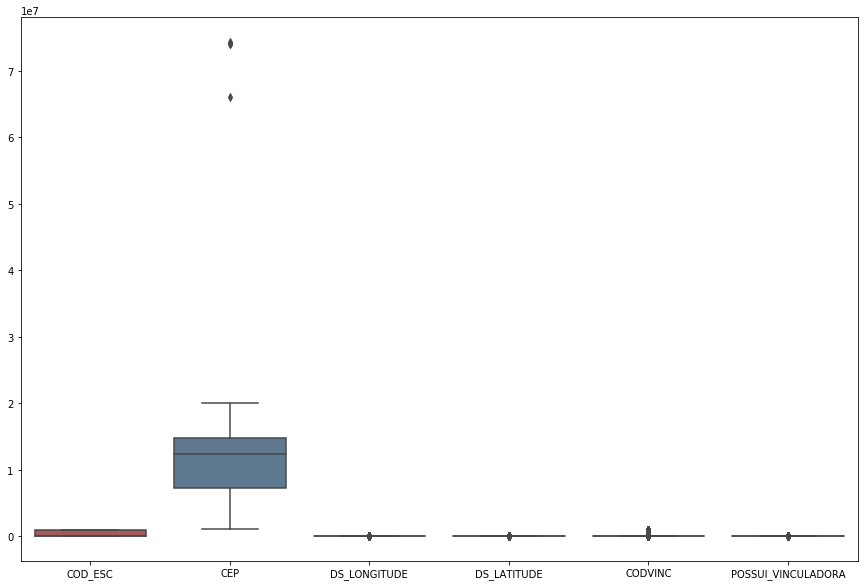

In [21]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_geolocation,
                 palette = sns_my_palete_01 )

## Exibir gráfico
plt.show()

<p>
    Com exceção do codigo da escola, todos os demais campos apresentaram outliers, mas dado as caracteristicas desses campos, podemos ignorar essa informação. A seguir esta pontuada uma explicação sobre esses outliers:
    <ol>
        <li><b>CEP</b>: A informação do CEP atua de forma categórica, afinal todo endereço possui um CEP associado;</li>
        <li><b>DS_LONGITUDE e DS_LATITUDE</b>: São coordenadas geográficas, portanto não há muito o que fazer com tal informação, ja que isso possui caracteristicas cadastrais, o que podemos fazer posteriormente é validar essas coordenadas usando a biblioteca Folium;</li>
        <li><b>CODVINC</b>: Refere-se basicamente ao codigo de outra escola no qual esta associada, não apresenta muita informação com isso;</li>
        <li><b>POSSUI_VINCULADORA</b>: Classe binária que apenas indica se a escola possui uma vinculadora ou não;</li>
    </ol>
</p>

<a id = 'head4_outlier_idesp_2019'></a>
<h4>6.2. Identificar e tratar outliers 'df_idesp_2019'</h4>

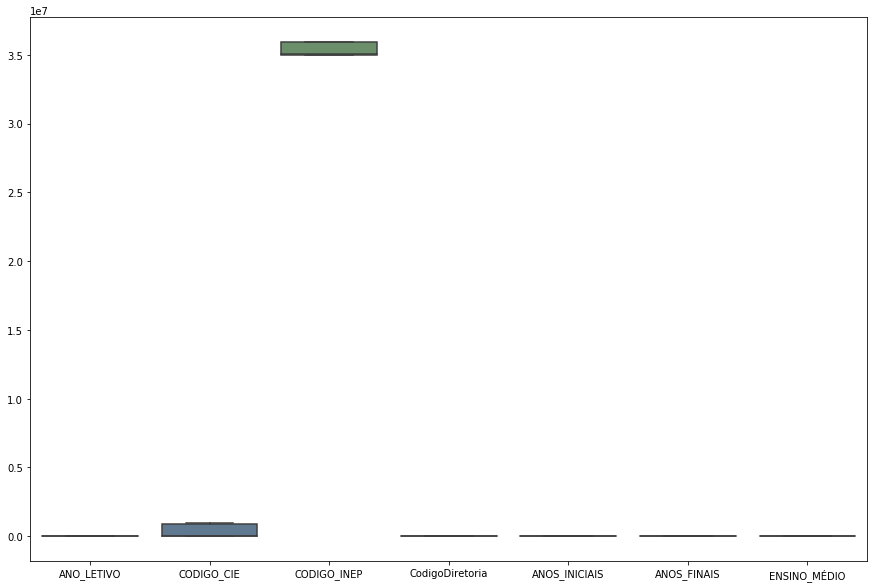

In [22]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_idesp_2019,
                 palette = sns_my_palete_01 )

## Exibir gráfico
plt.show()

<p>Não foram identificados outliers, mesmo nas variaveis que carregam as informações que serão preditas.🙏</p>

<a id = 'head4_outlier_school_dependency'></a>
<h4>6.3. Identificar e tratar outliers 'df_school_dependecy'</h4>
<p>Como existem muitas colunas, é interessante verificar os valores possiveis de cada coluna e assim determinar quais deverão ser analisadas, afinal, muitas possuem caracteristicas categoricas.</p>

In [23]:
## Lista de colunas numericas
lst_columns = df_school_dependecy.select_dtypes(include = np.number).columns.to_list()
lst_columns = [x for x in lst_columns if x not in('CODESC', 'TIPOESC')]

## Exibir quantidade de valores unicos por coluna
df_school_dependecy[lst_columns].nunique()


SALAS_AULA                      32
SALAS_ED_INF                     3
SALAS_ED_ESP                     4
SALAS_ED_ART                     3
SALA_RECURSO                     8
TOT_SALAS_AULA                  32
AUDITORIO                        3
ANFITEATRO                       5
TEATRO                           4
CANTINA                          3
COPA                             4
COZINHA                          6
REFEITORIO                       5
DEPOSITO_ALIMENTOS               7
DESPENSA                         8
TOT_DESPENSA                     9
SALA_LEITURA                     5
BIBLIOTECA                       4
TOT_SALA_LEITURA                 6
QUADRA_COBERTA                   4
QUADRA_DESCOBERTA                5
GINASIO                          2
TOT_QUADRA                       6
QUADRA_AREIA                     2
QUADRA_GRAMA                     2
CAMPO_FUTEBOL                    3
GABINETE_DENTARIO                3
CONSULTORIO_MEDICO               3
ENFERMARIA          

<p>Existem muitas colunas numericas, sendo assim precisaremos ver os valores unicos de cada coluna e sua quantidade. Uma tática interessante antes de ver coluna a coluna, é ver se tal coluna possui outliers, dessa forma conseguiremos filtrar com maior agilidade.</p>

In [24]:
def fn_validating_dataframe(p_df_dataframe):
    """
        Description:
            Valida algumas informações relacionadas ao dataframe

        Keyword arguments:
            p_df_dataframe -- Um pandas dataframe

        Return:
            None

        Exception:
            Valida se o objeto passado é um dataframe
            Valida se o dataframe não esta vazio
    """
    
    if not (isinstance(p_df_dataframe, pd.DataFrame)):
            raise Exception("O objeto passado não é um pandas dataframe")
            
    if p_df_dataframe.empty:
            raise Exception("O dataframe esta vazio")

In [25]:
def fn_number_of_outliers_per_dataframe(p_df_dataframe):
    """
        Description:
            Retorna o numero de outliers por coluna em um dado dataframe

        Keyword arguments:
            p_df_dataframe -- Um pandas dataframe

        Return:
            Objeto com o numero de outliers por coluna em um dataframe

        Exception:
            Valida se o objeto passado é um dataframe
            Valida se o dataframe não esta vazio
    """
    
    fn_validating_dataframe(p_df_dataframe)
        
    Q1 = p_df_dataframe.quantile(0.25)
    Q3 = p_df_dataframe.quantile(0.75)
    IQR = Q3 - Q1
    sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    return sr_out

In [26]:
## Numero de outliers por coluna
sr_num_outliers = fn_number_of_outliers_per_dataframe(df_school_dependecy[lst_columns])
sr_num_outliers = sr_num_outliers[sr_num_outliers > 0]

In [27]:
## numero de colunas que possuem outliers
len(sr_num_outliers)

128

<p>Com o processo feito anteriormente conseguimos identificar que dentre as 172 colunas originais do dataframe, temos que 128 possuem outliers. Precisaremos ver coluna a coluna os outliers e assim determinar o que fazer com eles.</p>

In [28]:
def fn_catching_outliers(p_df_dataframe, p_column):
    """
    Description:
        Função que localiza outliers em um dataframe e retorna tais dados

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        df_with_outliers -- Dataframe with the outliers located
        df_without_outliers -- Dataframe without the outilers
    
    Exception:
        None
    """
    # Check if the information passed is valid.
    fn_number_of_outliers_per_dataframe(p_df_dataframe)
    
    # Calculate the first and the third qurtile of the dataframe  
    Q1 = p_df_dataframe[p_column].quantile(0.25)
    Q3 = p_df_dataframe[p_column].quantile(0.75)    
  
    
    # Calculate the interquartile value
    IQR = Q3 - Q1
    
    #sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    
    # Generating the fence hig and low values
    fence_high = Q3 + (1.5 * IQR)
    fence_low = Q1 - (1.5 * IQR)
    
    # And Finally we are generating two dataframes, onde with the outliers values and the second with the values within values
    df_with_outliers = p_df_dataframe[((p_df_dataframe[p_column] < fence_low) | (p_df_dataframe[p_column] > fence_high))]
    
    if df_with_outliers.empty:
        print("No outliers were detected.")
    
    return df_with_outliers

In [29]:
def fn_show_individual_outlier(p_df_dataframe, p_column):
    """
    Description:
        Função que exibe um boxplot e as estatisticas descritivas de uma dada coluna de um dataframe

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        None
    
    Exception:
        None
    """
    ## Dataframe com as estatisticas descritivas
    df_summary = pd.DataFrame(p_df_dataframe[p_column].describe())

    ## Tamanho Figura
    plt.figure(figsize = (7, 9))
    
    ## Objeto referente ao boxplot
    ax = sns.boxplot(data = p_df_dataframe[p_column])
    
    ## deixando os x_ticks com valor em branco
    ax.set(xticklabels = [])
    ax.set(ylabel = None)
    
    ## Titulo do boxplot com o nome da coluna
    ax.set(title = 'Parâmetro: ' + p_column)
    
    ## Tabela que será gerada junto com o gráfico, onde tera as estatisticas
    statistics_table = plt.table( cellText = df_summary.values,
                                    rowLabels = df_summary.index,
                                    colLabels =  ' ',
                                    cellLoc = 'left', 
                                    rowLoc = 'center',            
                                    loc ='bottom')
    
    ## Tamanho da fonte da tabela
    statistics_table.set_fontsize(12)
    
    ## Escala da tabela
    statistics_table.scale(1, 2)
    
    ## Colocar a tabela debaixo do boxplot
    plt.subplots_adjust(left = 0.2, bottom = .1)
    
    ## Exibir figura
    plt.show()

In [30]:
## Verificando a coluna 'SALAS_AULA'
df_out = fn_catching_outliers(df_school_dependecy, 'SALAS_AULA')

## Verificar as primeiras escolas
df_out.head(5)

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,...,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
249,ESTADUAL - SE,ARARAQUARA,ARARAQUARA,ARARAQUARA,21854,BENTO DE ABREU,8,EE,Ativa,26,0,0,0,3,29,0,1,0,1,0,2,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
469,ESTADUAL - SE,BAURU,BAURU,BAURU,25598,CHRISTINO CABRAL PROF,8,EE,Ativa,26,0,0,2,0,26,1,0,0,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
847,ESTADUAL - SE,CAMPINAS OESTE,CAMPINAS,CAMPINAS OESTE,901124,CELESTE PALANDI DE MELLO PROFESSORA,8,EE,Ativa,29,0,1,0,0,29,0,0,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
897,ESTADUAL - SE,CAMPINAS OESTE,CAMPINAS,CAMPINAS OESTE,907397,PAUL EUGENE CHARBONNEAU PROF DOUTOR,8,EE,Ativa,26,0,0,0,0,26,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1153,ESTADUAL - SE,CENTRO,SAO PAULO,CONSOLACAO,3852,CAETANO DE CAMPOS CONSOLACAO,8,EE,Ativa,27,0,0,0,0,27,0,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


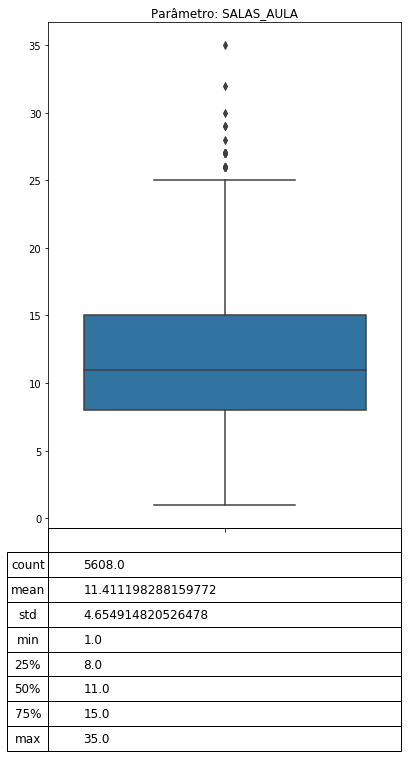

In [31]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_AULA')

<p>Tanto o boxplot quanto as estatisticas descritivas mostram que há outlier referentes ao parametro 'SALAS_AULA', entretanto tal parametro esta relacionado ao numero de salas de aula de uma escola, logo é muito comum escolas com poucas ou muitas salas. Esse tipo de outlier faz sentido</p>

In [32]:
## Verificando a coluna 'SALAS_ED_INF'
df_out = fn_catching_outliers(df_school_dependecy, 'SALAS_ED_INF')

## Verificar as primeiras escolas
df_out.head(5)

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,...,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
660,ESTADUAL - SE,BRAGANCA PAULISTA,SOCORRO,SOCORRO,912918,HELENA JOSE BONFA PROFESSORA,8,EE,Ativa,4,1,0,0,0,5,0,0,0,0,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
991,ESTADUAL - SE,CARAGUATATUBA,ILHABELA,ILHABELA,11228,GABRIEL RIBEIRO DOS SANTOS DOUTOR,8,EE,Ativa,19,1,0,0,0,20,0,0,0,1,1,4,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1907,ESTADUAL - SE,ITAPEVA,CAPAO BONITO,CAPAO BONITO,926036,BAIRRO TURVO DOS ALMEIDAS,8,EE,Ativa,7,3,0,0,0,10,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


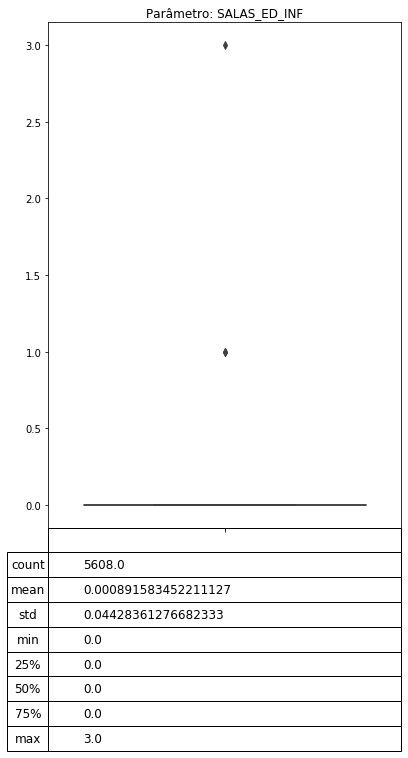

In [33]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_INF')

<p>Tanto o boxplot quanto as estatisticas descritivas mostram que há outlier referentes ao parametro 'SALAS_ED_INF', entretanto tal parametro esta relacionado a salas de educação infantil, não é uma situação muito comum, mas faz sentido escolas terem salas para crianças, algo bem comum em pré-escolas.</p>

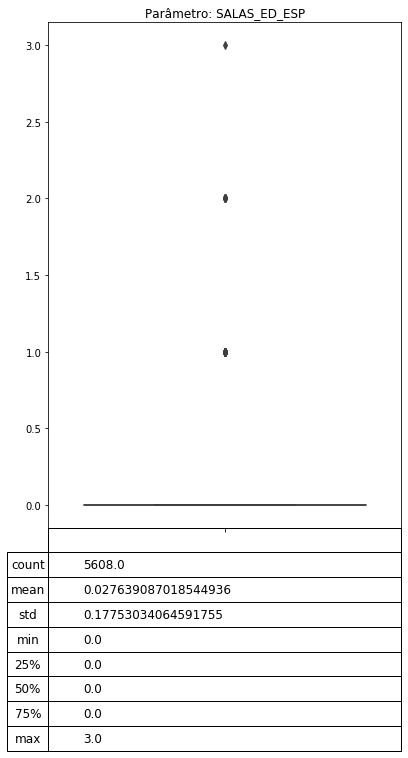

In [34]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_ESP')

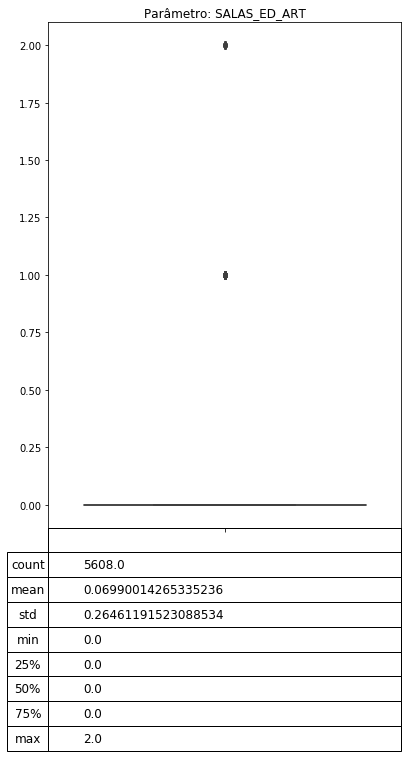

In [35]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_ART')

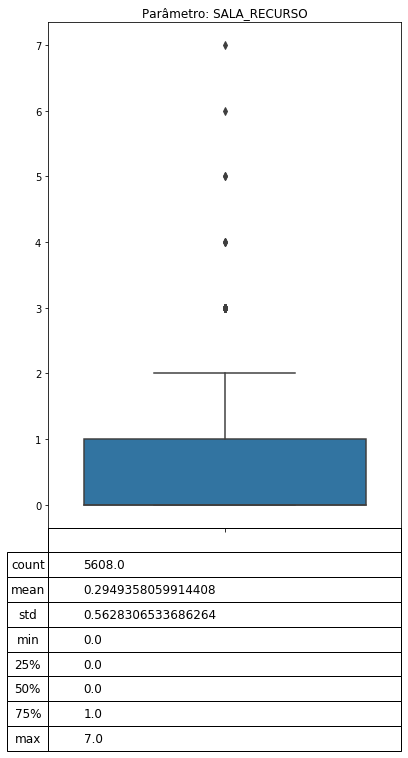

In [36]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_RECURSO')

<p>Os parâmetros 'SALAS_ED_ESP', 'SALAS_ED_ART' 'SALA_RECURSO' referem-se respectivamente a salas de educação especial, salas de educação artística e salas de recurso que nada mais são do que salas extras com propositos distintos, não é incomum escolas terems salas e recursos distintos.</p>

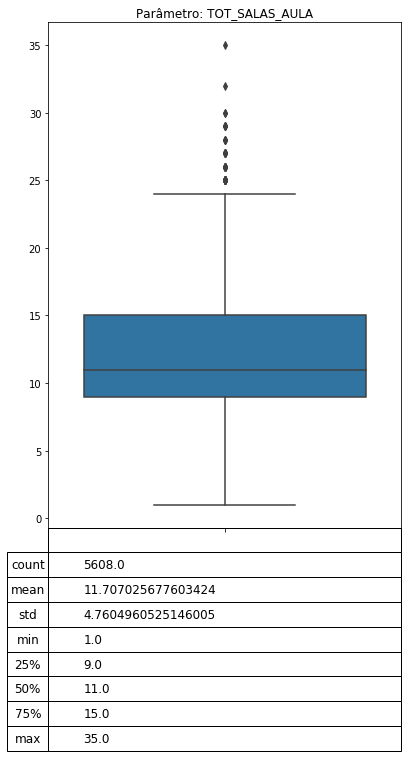

In [37]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SALAS_AULA')

<p>Dado que existem escolas pequenas e grandes no dataset bem como escolas com salas distintas das demais, como sala de educação artística, é comum haver outliers no total de salas. Para evitar problemas futuros de multicolinearidade, os hiperparametros referentes as salas serão removidos, pois o 'TOT_SALAS_AULA' possui o valor agrupado.</p>

In [38]:
## Dado as possiveis alterações, uma copia deverá ser feita
df_school_dependecy_treat = df_school_dependecy.copy(deep = True)

## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['SALAS_ED_INF', 'SALAS_ED_ESP', 
                                                     'SALAS_ED_ART', 'SALA_RECURSO',
                                                     'SALAS_AULA'])

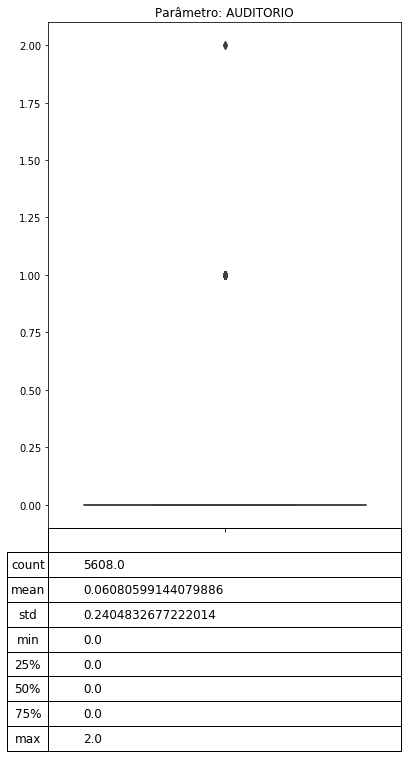

In [39]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'AUDITORIO')

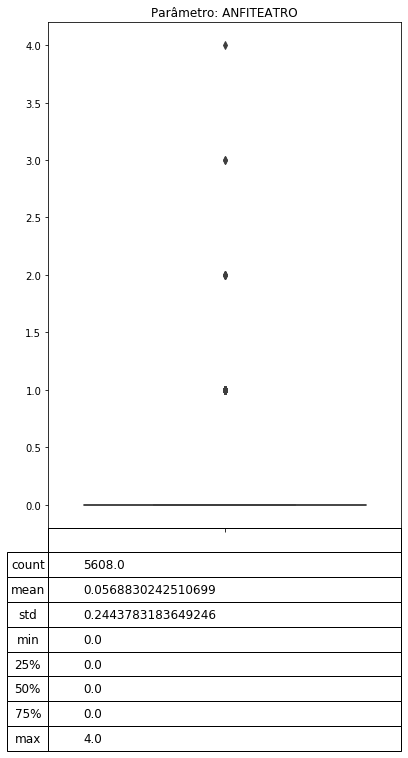

In [40]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ANFITEATRO')

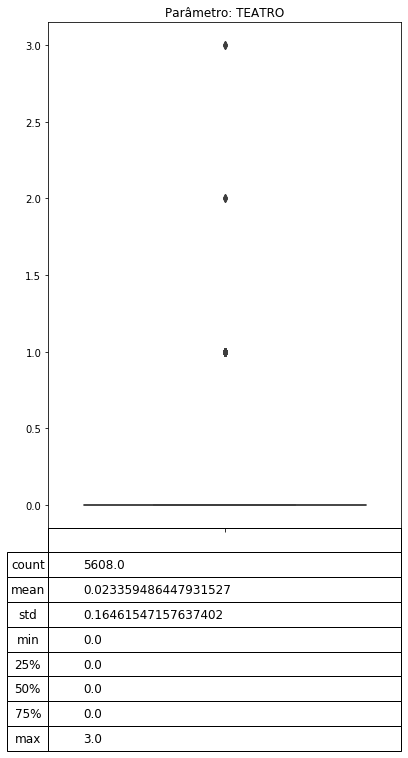

In [41]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TEATRO')

<p>Os parametros referentes ao auditorio, anfiteatro e teatro apresentam muitos outliers, mas faz sentido essa discrepancia por que há escolas com tais dependencias ou não, e algumas com mais de uma.</p>

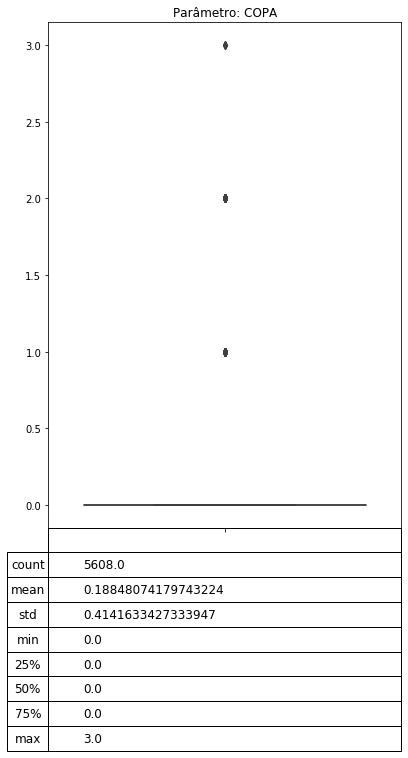

In [42]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'COPA')

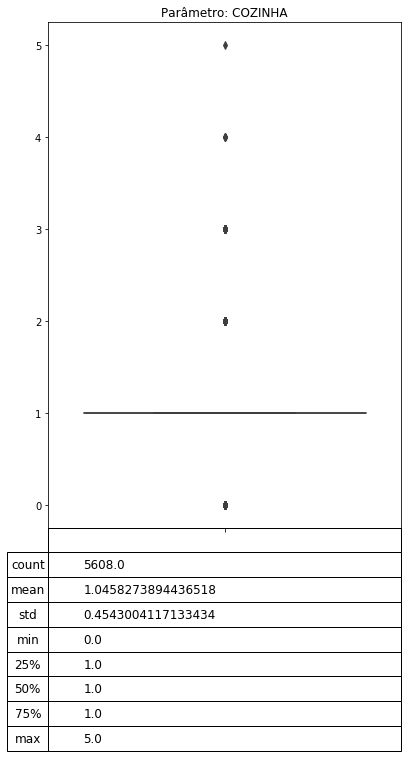

In [43]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'COZINHA')

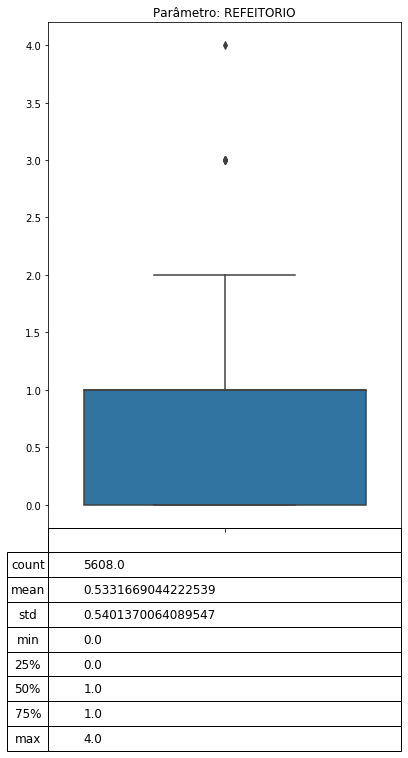

In [44]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'REFEITORIO')

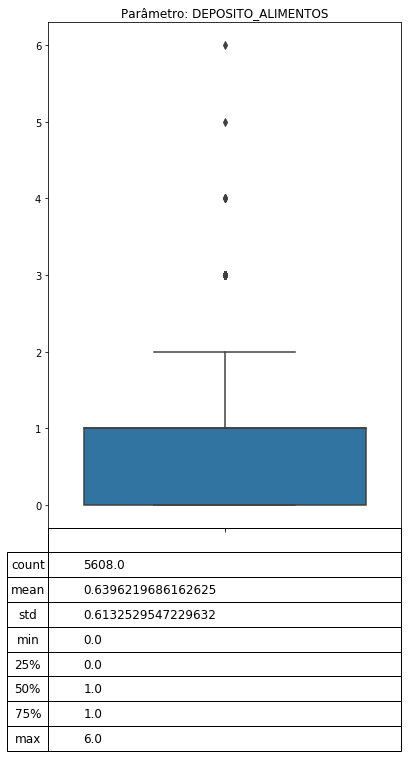

In [45]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DEPOSITO_ALIMENTOS')

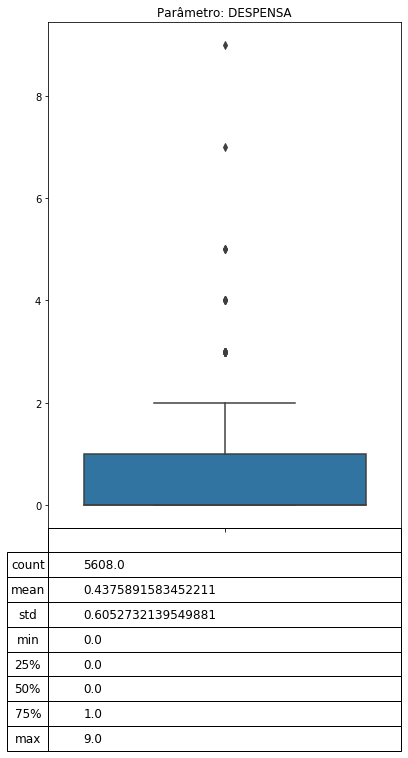

In [46]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DESPENSA')

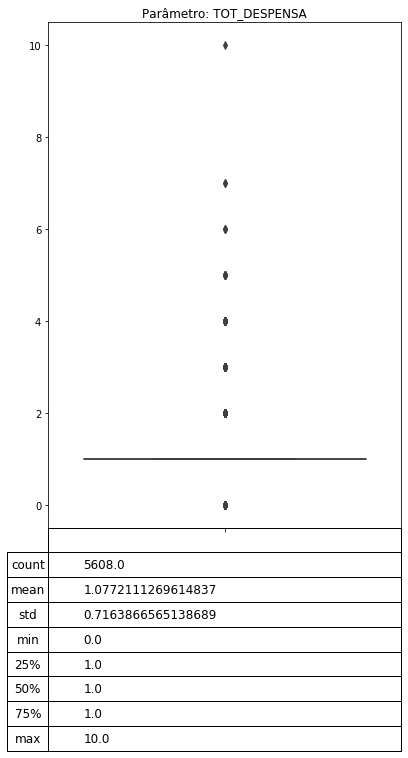

In [47]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_DESPENSA')

<p>As informações mostradas anteriormente se referem a alimentação como um todo nas escolas, onde os principais parametros relacionados a cozinha forma mostrados e em todos foram identificados outliers. O parametro com uma quantidade elevada de outliers foi o 'TOT_DESPENSA' que basicamente é oriundo de um calculo envolvendo os demais parametros. Nesse primeiro momento e devido a quantidade de outliers ele será removido do dataframe.</p>

In [48]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_DESPENSA'])

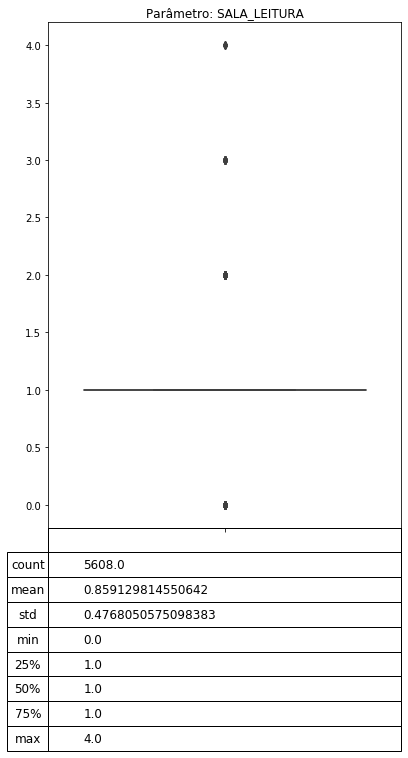

In [49]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_LEITURA')

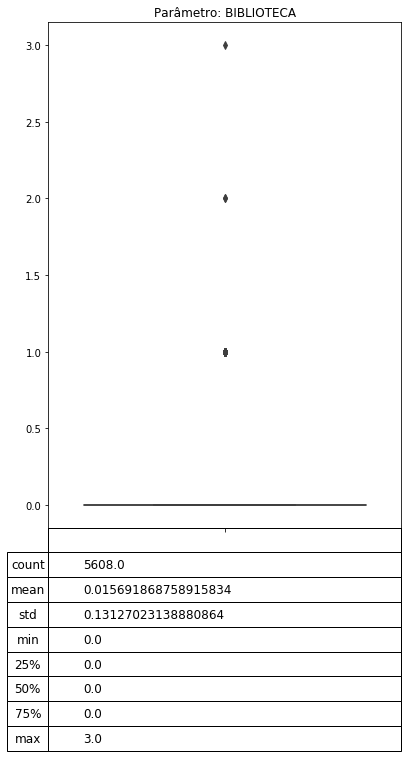

In [50]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'BIBLIOTECA')

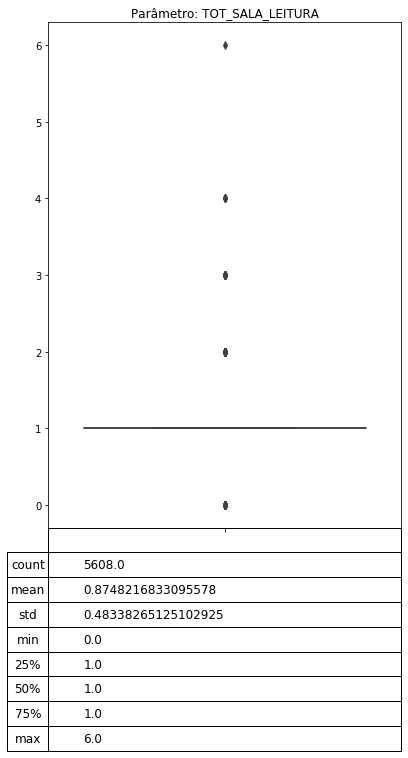

In [51]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SALA_LEITURA')

<p>Os parâmetros referentes a quantidade de salas de leitura e bibliotecas, fazem sentido pra regra de negocio. Entretanto a variavel TOT_SALA_LEITURA será removido pois seus dados ja são refletidos nas demais variaveis.</p>

In [52]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_SALA_LEITURA'])